# **Objective**: To predict diabetes on diagnotstic using logistic regression

**Data Source**: [Pime Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [182]:
# import libraries for diabities model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [183]:
#prepare a header with easy to use feature names.
column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data_set = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv", header=None, names=column_names, skiprows=(0,0))

In [184]:
#check some values
data_set.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [185]:
#Check information of data-frame
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [186]:
#data_frame.describe
data_set.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [187]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations from the above :**
* The values for the pregnancies needs to be checked as the mean suggests the value 3.84 which is close to 4 which seems to be a little bit on the higher side.
* Columns have values as 0 at some places which is cleary incorrect data/missing values.
* Independent/Predictor Variables : Pregnancies,Glucose,BloodPressure, Pedigree, Insulin. BMI, Age.
* Dependent/Target Variable : Label.

In [188]:
#convert string into number
convert_col = ['pregnant', 'insulin', 'bmi',  'age', 'glucose', 'bp', 'pedigree']
for col in convert_col: #Iterate over chosen columns
    data_set[col] = pd.to_numeric(data_set[col])

**Data Cleaning:**

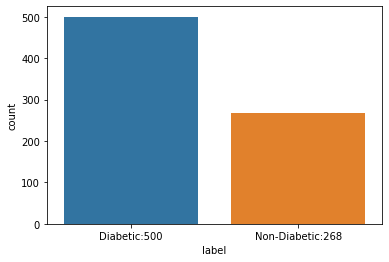

In [189]:
ax = sns.countplot(x=data_set["label"],data=data_set)
valcount = data_set['label'].value_counts().values.tolist()
ax.set_xticklabels(
    ['Diabetic'+':'+str(valcount[0]),'Non-Diabetic'+':'+str(valcount[1])]
);

In [190]:
#Finding number of missing values
data_set[['glucose', 'bp', 'skin', 'insulin']] = data_set[['glucose', 'bp', 'skin', 'insulin']].replace(0,np.NaN)

In [191]:
for col in data_set[['glucose', 'bp', 'skin', 'insulin']]:
    print(col
          +':'
          +str(data_set[col].isnull().sum()) # to count number of Null values
          +'\npercentage : '
          +str((data_set[col].isnull().sum())/(len(data_set[col]))*100) + '\n' # To calculate the percentage of Null Values
         )

glucose:5
percentage : 0.6510416666666667

bp:35
percentage : 4.557291666666666

skin:227
percentage : 29.557291666666668

insulin:374
percentage : 48.69791666666667



In [192]:
#filling null values with median values
data_set = data_set.fillna(data_set.median())
#checking if any null values left
data_set.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [193]:
data_set.groupby(['label']).count()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


**Features:**

In [194]:
#feature selection
feature_columns = ['pregnant', 'insulin', 'bmi',  'age', 'glucose', 'bp', 'pedigree']
X = data_set[feature_columns]
y = data_set.label

In [195]:
display(X)

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,125.0,33.6,50,148.0,72.0,0.627
1,1,125.0,26.6,31,85.0,66.0,0.351
2,8,125.0,23.3,32,183.0,64.0,0.672
3,1,94.0,28.1,21,89.0,66.0,0.167
4,0,168.0,43.1,33,137.0,40.0,2.288
...,...,...,...,...,...,...,...
763,10,180.0,32.9,63,101.0,76.0,0.171
764,2,125.0,36.8,27,122.0,70.0,0.340
765,5,112.0,26.2,30,121.0,72.0,0.245
766,1,125.0,30.1,47,126.0,60.0,0.349


Text(493.8000000000002, 0.5, 'Features Values on X axis')

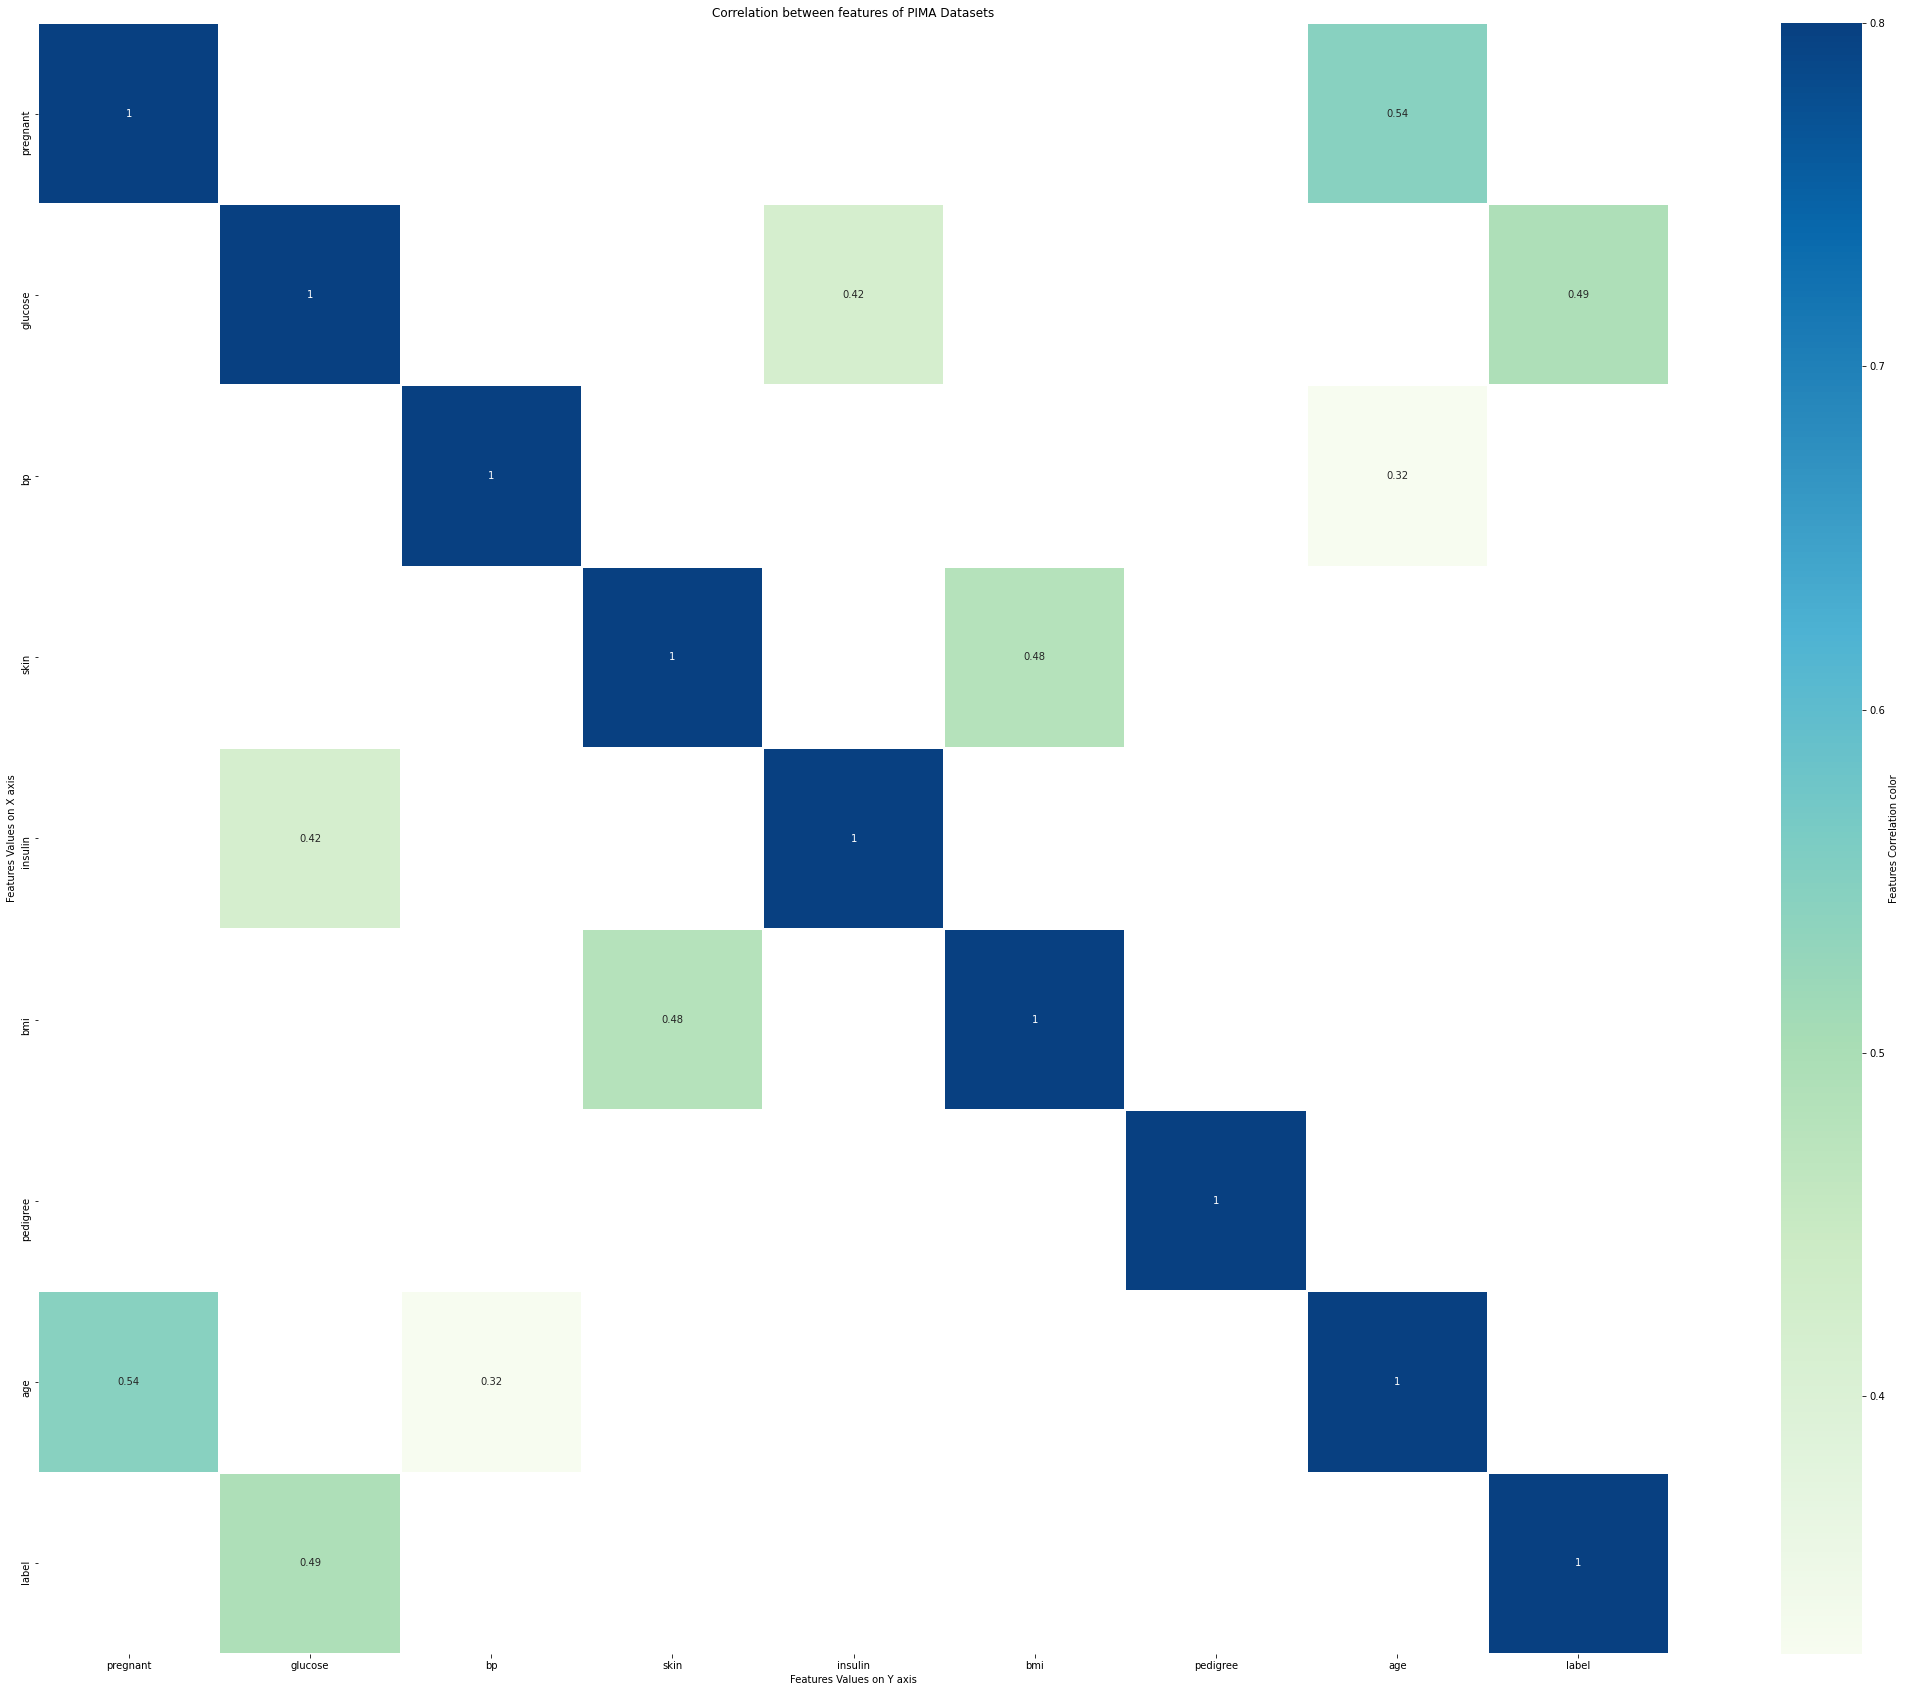

In [196]:
#Checking correlation and creating a Correlation plot
corr = data_set.corr()
plt.figure(figsize=(40,30))

#coor_range is definging correlation matrix. basically the range of values for corr
coor_range = corr[(corr>= 0.3) | (corr <= -0.1)]
#Creating a heat map
#linewidths are the width of line of each cell.
# square = true makes each cell a square
# annot=True display the data values of each cell in the cell respectively
#cmap='GnBu' map the range with color values
#linecolor is the color of line that divides each cell
#cbar_kws shows color bar and is dictionary of key  value mapping
sns.heatmap(coor_range, vmax = .8, linewidths=0.01, square=True, annot=True, cmap='GnBu', linecolor="white", cbar_kws={'label': 'Features Correlation color'})
# adding a titlle to the plot and X and Y-axis lables
plt.title('Correlation between features of PIMA Datasets')
plt.xlabel('Features Values on Y axis')
plt.ylabel('Features Values on X axis')


In [197]:
#split the dataset into test and training data
X_train,X_test,y_train,y_test = train_test_split (X, y, test_size=0.20, random_state=42)

In [198]:
#Applying the logistic Regression algorithm
logistic_function= LogisticRegression(max_iter=1000)

In [199]:
#Fit the model with training data
logistic_function.fit(X_train, y_train)
y_prediction=logistic_function.predict(X_test)

In [200]:
#Model Evaluation using Confusion matrix for the performance of classification model
#Basically checks our predicted values of label(Outcome) with our test data values of label(outcome)
cnf_matrix_evaluation = metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix_evaluation

array([[83, 16],
       [21, 34]])

true negatives(83), false negatives(16),  true positives(21), false positives(34)

Text(0.5, 15.0, 'Predicted label')

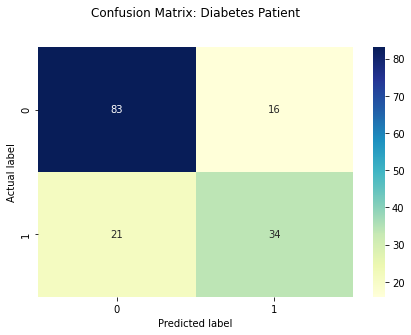

In [201]:
class_names = [0,1] #naming the classes
#using subplots we can make all our plots at one time and display it.
fig, ax = plt.subplots()
tick_marks  = np.arange(len(class_names))
#creating tick marks on plot
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#creating heatmap for visualizing confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix: Diabetes Patient', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [202]:
#confusion matrix conclusion for the evaluation matrics
#Accuracy is ratio of correctly predicted observation to the total observations.
print("Accuracy:", metrics.accuracy_score(y_test,y_prediction))
#Precision is the ratio of correctly predicted positive obe=servations to the total predicted positive observations
print("Precision:", metrics.precision_score(y_test,y_prediction))
#Recall is the ratio of correctly predicted positive observations to all the observations in the class
print("Recall:", metrics.recall_score(y_test,y_prediction))

Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182


In [203]:
print(metrics.accuracy_score(y_test,y_prediction)*100 , "% : chances that the person is having diabetes in the present dataset")
print(y_prediction)

75.97402597402598 % : chances that the person is having diabetes in the present dataset
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


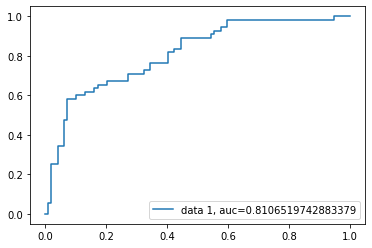

In [204]:
#performance evaluation using the ROC curve, Receiver Operating Characterstic(ROC) curve is a graphical plot of the illustrate the diagnostic ability of a Binary Classifier system.
#It shows the tradeoff between sensitivity and specificity.

y_prediction_probability = logistic_function.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prediction_probability)
auc = metrics.roc_auc_score(y_test, y_prediction_probability)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#Note: AUC score for the case is 0.81. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [205]:
#f1_score is a weighted average of precision and recall values
metrics.f1_score(y_test, y_prediction, average=None)

array([0.81773399, 0.64761905])